# 1.import libraries and dataset

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
My_data = pd.read_csv("/Users/user/Downloads/dow_jones_index/dow_jones_index.csv")

My_data

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


# 2.Explor dataset

In [3]:
My_data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [4]:
My_data.tail()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.52161,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.42098,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.22500,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.37762,54,0.594786
749,2,XOM,6/24/2011,$78.65,$81.12,$76.78,$76.78,118679791,-2.37762,18.064204,100521400.0,$76.88,$82.01,6.67274,47,0.612139


In [5]:
My_data.shape

(750, 16)

In [6]:
My_data.info() # dataset info before dropping the instances with missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [7]:
My_data.style

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,nan,nan,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.000000,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.000000,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.000000,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.000000,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.000000,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.000000,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.000000,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.000000,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.000000,$15.95,$16.11,1.003130,62,0.187149


In [8]:
My_data.isnull().sum() #The sum of null values for each attribute

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

<AxesSubplot:>

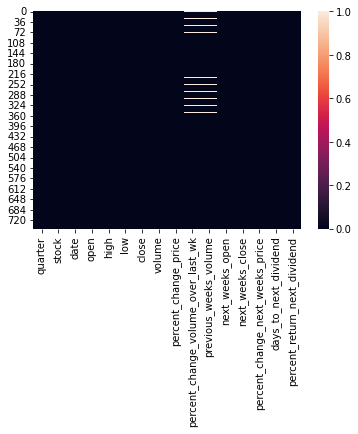

In [9]:
sns.heatmap(My_data.isna()) #Heat map of missing values 

# 3.Data preprocessing

In [10]:
My_data=My_data.dropna() #removing the missing values since they appear in an important attribute 


In [11]:
My_data.shape # The size of the dataset after removing the 30 missing values 


(720, 16)

In [12]:
My_data.info() #The dataset info after the removal of missing values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 1 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             720 non-null    int64  
 1   stock                               720 non-null    object 
 2   date                                720 non-null    object 
 3   open                                720 non-null    object 
 4   high                                720 non-null    object 
 5   low                                 720 non-null    object 
 6   close                               720 non-null    object 
 7   volume                              720 non-null    int64  
 8   percent_change_price                720 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     720 non-n

In [13]:
My_data.drop(My_data.columns[[2,3,4,5,6,7,10,11,12]], axis=1, inplace=True) #dropping irrelevant attributes
My_data

/Users/user/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,quarter,stock,percent_change_price,percent_change_volume_over_last_wk,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,AA,-4.428490,1.380223,-2.470660,19,0.187852
2,1,AA,-2.470660,-43.024959,1.638310,12,0.189994
3,1,AA,1.638310,9.355500,5.933250,5,0.185989
4,1,AA,5.933250,1.987452,0.230814,97,0.175029
5,1,AA,0.230814,-25.712195,-0.632547,90,0.172712
...,...,...,...,...,...,...,...
745,2,XOM,3.004240,-21.355713,-2.521610,75,0.568801
746,2,XOM,-2.521610,15.221032,-1.420980,68,0.578960
747,2,XOM,-1.420980,17.508519,-1.225000,61,0.589120
748,2,XOM,-1.225000,8.811952,-2.377620,54,0.594786


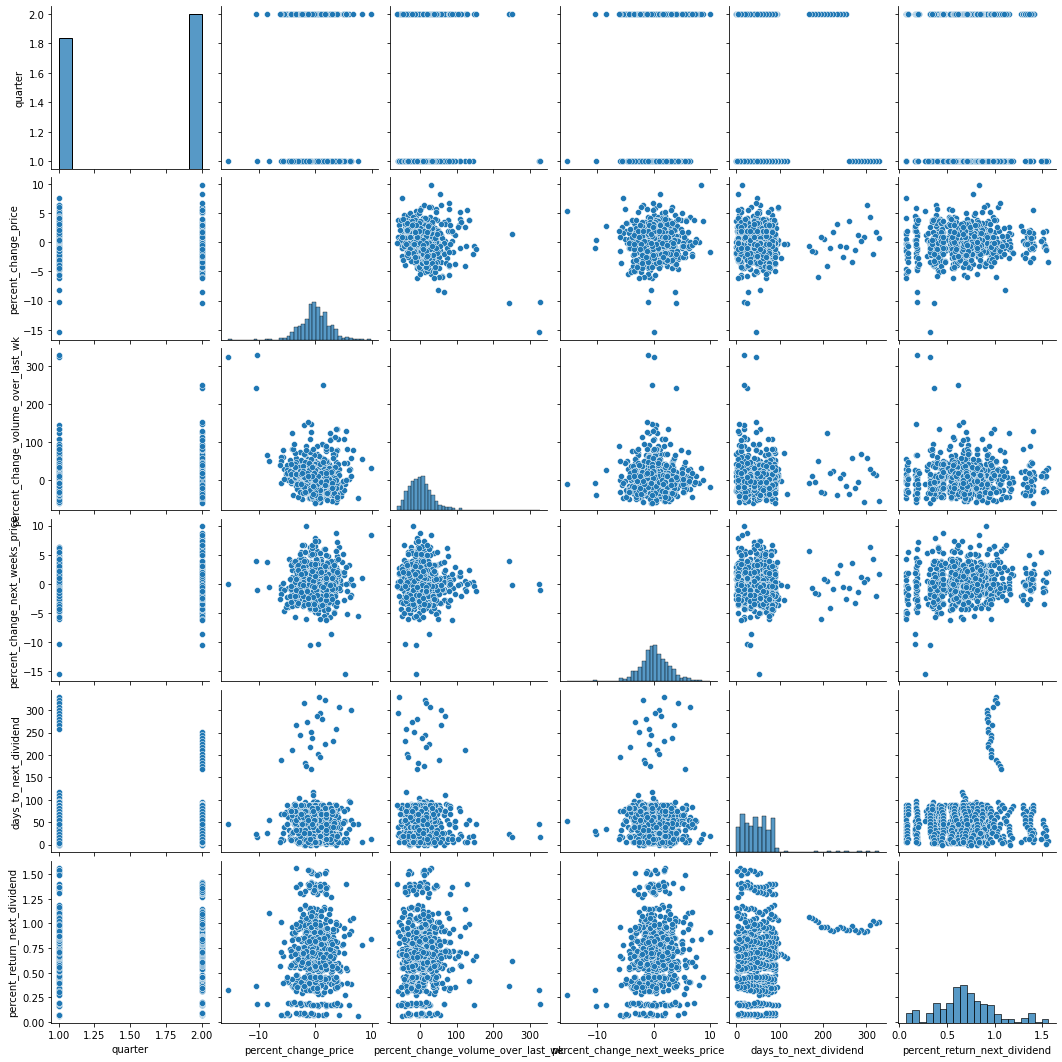

,quarter,percent_change_price,percent_change_volume_over_last_wk,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
quarter,1.000000,0.076259,0.023662,0.000098,0.020749,0.007963
percent_change_price,0.076259,1.000000,0.234496,0.020639,0.009060,0.049963
percent_change_volume_over_last_wk,0.023662,0.234496,1.000000,0.013181,0.033348,0.017486
percent_change_next_weeks_price,0.000098,0.020639,0.013181,1.000000,0.028797,0.103009
days_to_next_dividend,0.020749,0.009060,0.033348,0.028797,1.000000,0.119733
percent_return_next_dividend,0.007963,0.049963,0.017486,0.103009,0.119733,1.000000


In [14]:
#Correlations 
sns.pairplot(My_data)
plt.show()

My_data.corr().abs()

In [15]:
My_data.style

,quarter,stock,percent_change_price,percent_change_volume_over_last_wk,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,AA,-4.428490,1.380223,-2.470660,19,0.187852
2,1,AA,-2.470660,-43.024959,1.638310,12,0.189994
3,1,AA,1.638310,9.355500,5.933250,5,0.185989
4,1,AA,5.933250,1.987452,0.230814,97,0.175029
5,1,AA,0.230814,-25.712195,-0.632547,90,0.172712
6,1,AA,-0.632547,-30.226696,-1.766780,83,0.173611
7,1,AA,-1.766780,66.177694,-1.368230,76,0.179856
8,1,AA,-1.368230,-17.663150,-3.317250,69,0.180941
9,1,AA,-3.317250,4.419900,1.003130,62,0.187149
10,1,AA,1.003130,14.030601,4.334550,55,0.186220


In [16]:
My_data.info() #Data info after removal of missing values and unnecessary variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 1 to 749
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             720 non-null    int64  
 1   stock                               720 non-null    object 
 2   percent_change_price                720 non-null    float64
 3   percent_change_volume_over_last_wk  720 non-null    float64
 4   percent_change_next_weeks_price     720 non-null    float64
 5   days_to_next_dividend               720 non-null    int64  
 6   percent_return_next_dividend        720 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 61.2+ KB


In [17]:
#Encoding the categorical variable "stock" 
#creating an instance of labelenconder 
labelencoder=LabelEncoder()
My_data["stock"]=labelencoder.fit_transform(My_data["stock"])
My_data

/var/folders/_q/jfqthswd23z3ccz67fmgypgm0000gn/T/ipykernel_87069/3985874205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  My_data["stock"]=labelencoder.fit_transform(My_data["stock"])


,quarter,stock,percent_change_price,percent_change_volume_over_last_wk,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,0,-4.428490,1.380223,-2.470660,19,0.187852
2,1,0,-2.470660,-43.024959,1.638310,12,0.189994
3,1,0,1.638310,9.355500,5.933250,5,0.185989
4,1,0,5.933250,1.987452,0.230814,97,0.175029
5,1,0,0.230814,-25.712195,-0.632547,90,0.172712
...,...,...,...,...,...,...,...
745,2,29,3.004240,-21.355713,-2.521610,75,0.568801
746,2,29,-2.521610,15.221032,-1.420980,68,0.578960
747,2,29,-1.420980,17.508519,-1.225000,61,0.589120
748,2,29,-1.225000,8.811952,-2.377620,54,0.594786


In [18]:
#Identifying Outliers 
k = np.abs(stats.zscore(My_data)) 
print(k)

#setting threshold
threshold = 2 

#removing outliers
My_data =My_data[(k<2).all(axis=1)] #Any value laying outside the range -2 to 2 is considered an outlier()


      quarter     stock  percent_change_price  \
1    1.087115  1.675247              1.781209   
2    1.087115  1.675247              0.999062   
3    1.087115  1.675247              0.642459   
4    1.087115  1.675247              2.358274   
5    1.087115  1.675247              0.080168   
..        ...       ...                   ...   
745  0.919866  1.675247              1.188143   
746  0.919866  1.675247              1.019416   
747  0.919866  1.675247              0.579718   
748  0.919866  1.675247              0.501425   
749  0.919866  1.675247              0.961893   

     percent_change_volume_over_last_wk  percent_change_next_weeks_price  \
1                              0.103995                         1.000729   
2                              1.200005                         0.542819   
3                              0.092851                         2.156228   
4                              0.089008                         0.014089   
5                              

/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='percent_change_price'>

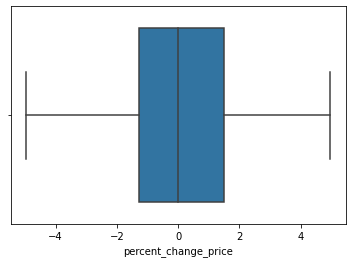

In [19]:
sns.boxplot(My_data['percent_change_price']) #checking randomly for outliers in the "percent_change_price" variable: None

In [20]:
My_data.describe() #To check the range of variables 

,quarter,stock,percent_change_price,percent_change_volume_over_last_wk,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,1.534636,14.600355,0.019390,-0.312423,0.127221,46.992895,0.653366
std,0.499242,8.416333,2.067229,28.521474,2.196002,27.155869,0.228235
min,1.000000,0.000000,-4.970510,-60.988311,-4.990130,0.000000,0.083822
25%,1.000000,7.000000,-1.261810,-21.124594,-1.248685,25.000000,0.538715
50%,2.000000,15.000000,0.000000,-2.581847,0.026011,47.000000,0.669199
75%,2.000000,21.000000,1.504585,17.328582,1.677245,68.500000,0.803432
max,2.000000,29.000000,4.969700,81.585171,5.447940,118.000000,1.299050


# .Data visualization: 

/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

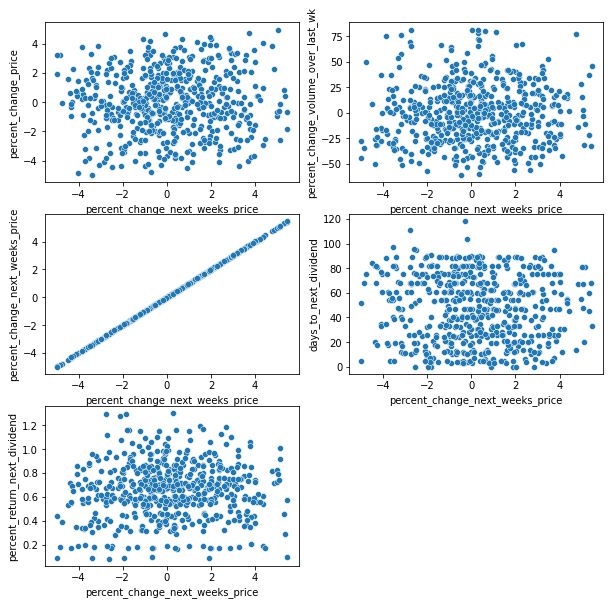

In [21]:
#Scatter plots
columns = list(My_data.columns)
columns.remove('stock')
columns.remove('quarter') 

count=1
plt.subplots(figsize=(10, 10))
for i in columns:
    plt.subplot(3,2,count)
    sns.scatterplot(My_data["percent_change_next_weeks_price"],My_data[i])
    count+=1

plt.show()
    

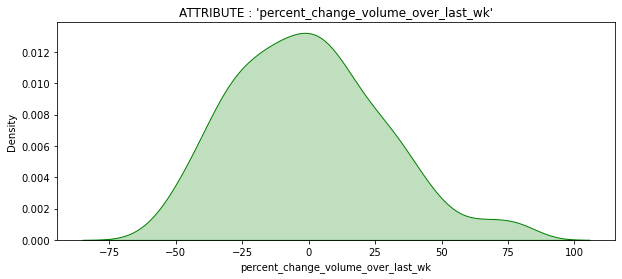

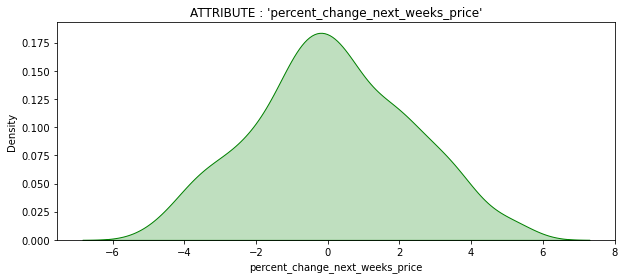

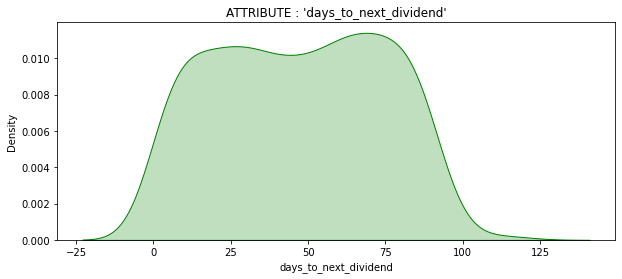

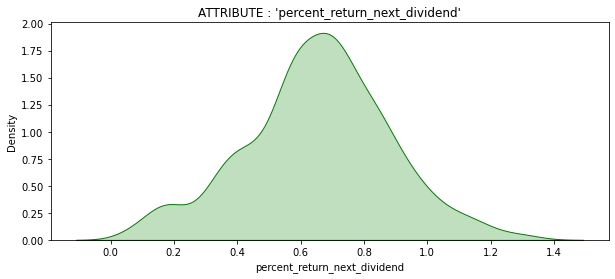

In [22]:
#Histograms of each attribute
for i in My_data.columns[3:]:
    plt.figure(figsize=(10,4))
    plt.title("ATTRIBUTE : '%s'"%i)
    sns.kdeplot(My_data[i],fill=True, color = 'Green')

<AxesSubplot:>

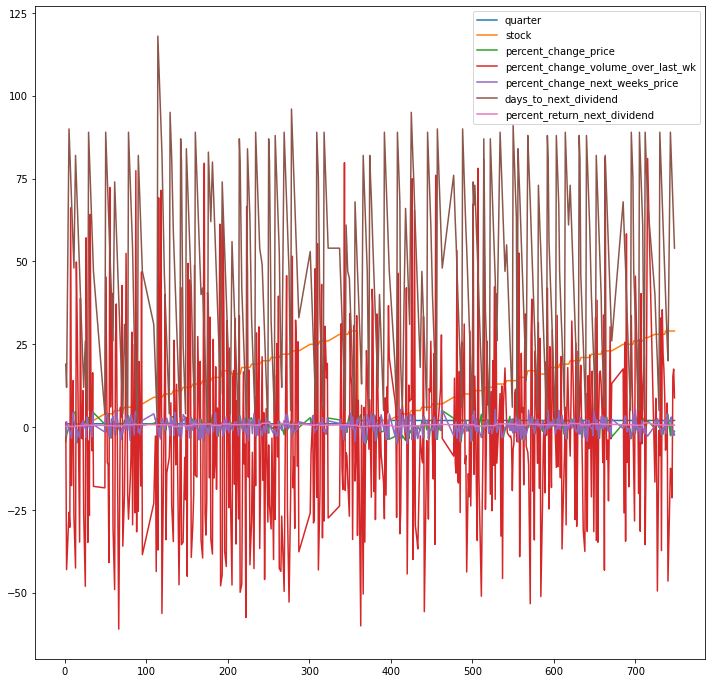

In [23]:
My_data.plot(figsize=(12,12)) #Variations

# dimension reduction using PCA

In [24]:
#Standardization before PCA
ss = StandardScaler() 
scaled = ss.fit_transform(My_data) 
My_data= pd.DataFrame(scaled)

In [25]:
#PCA
pca = PCA(n_components = 2) 
My_data = pca.fit_transform(My_data)
My_data

array([[ 2.96815592, -0.12947306],
       [ 2.39495702,  1.61028747],
       [ 2.68590235,  1.05169349],
       ...,
       [-0.46484004, -1.86885358],
       [-0.62320932, -1.51512911],
       [-0.63541882, -1.24106928]])

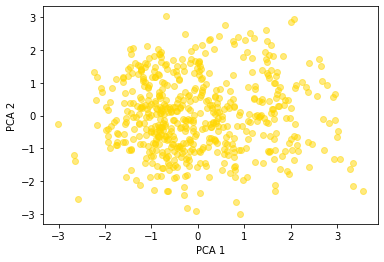

,principal component 1,principal component 2
count,5.630000e+02,5.630000e+02
mean,8.972495e-17,-1.419823e-16
std,1.217616e+00,1.139017e+00
min,-3.009476e+00,-3.001023e+00
25%,-8.705120e-01,-8.505662e-01
50%,-2.293951e-01,-4.740447e-02
75%,7.883802e-01,8.056009e-01
max,3.550870e+00,3.032789e+00


In [26]:
Pca_df = pd.DataFrame(data = My_data, columns = ['principal component 1', 'principal component 2']) #showing the two components 
Pca_df
plt.scatter(Pca_df["principal component 1"], Pca_df["principal component 2"], alpha=.5, color='gold')
plt.xlabel('PCA 1') 
plt.ylabel('PCA 2')
plt.show()
Pca_df.describe()

In [27]:
My_data.shape

(563, 2)

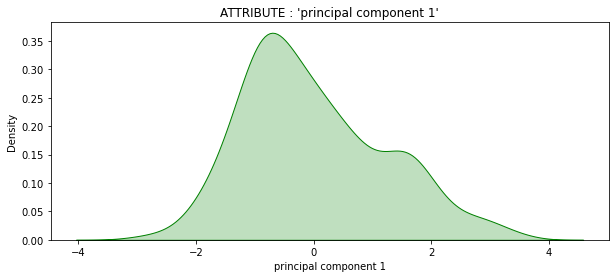

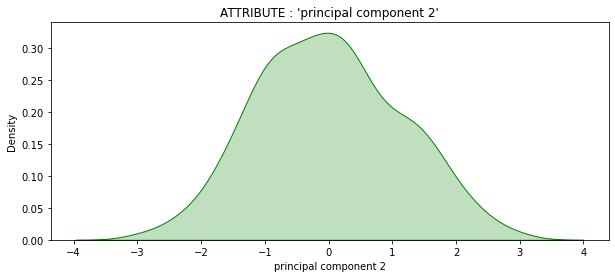

In [28]:
#Data distribution after PCA
for i in Pca_df.columns[:]:
    plt.figure(figsize=(10,4))
    plt.title("ATTRIBUTE : '%s'"%i)
    sns.kdeplot(Pca_df[i],fill=True, color = 'Green')

# 4.Build k-means Model

In [29]:
#Normalization before k-means
scaler = MinMaxScaler()
My_data = scaler.fit_transform(My_data)

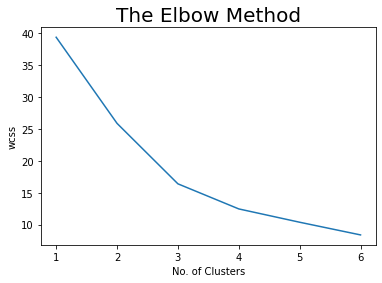

In [30]:
#Determining the k number

wcss = [] #within-cluster sum of squares
for i in range(1, 7):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(My_data)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

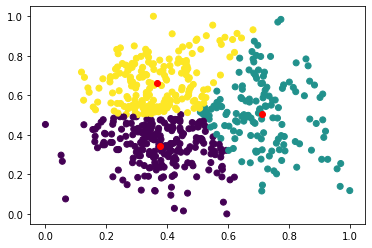

In [31]:
# creating KMeans 
model = KMeans(n_clusters = 3)
model.fit(My_data)
labels = model.predict(My_data)
plt.scatter(My_data[:,0], My_data[:,1],c=model.predict(My_data))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='r')

In [32]:
model.inertia_

16.395526043973817